In [45]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import pandas as pd
import pickle

def plot_lorenz(pop, color):

    pop_2 = pop.copy()
    pop_2.sort()
    final_wealth = sum(pop_2)

    cumulative_wealth = [] # cumulative wealth as a percentage of total wealth

    for i in range(101):
        cumulative_wealth.append(((sum(pop_2[:int(i/100 * len(pop))]))/final_wealth)*100)

    x = np.linspace(0,100,101)

    plt.plot(x, cumulative_wealth, color = color)
    plt.plot(x,x, color = 'b')

    plt.text(2, 7, 'equality line',
             rotation=45,
             horizontalalignment='center',
             verticalalignment='center',
             multialignment='center')


    plt.xlabel(' % percentile of population')
    plt.ylabel('cumulatative wealth as a percentage')
    plt.title('lorenz curve')

    plt.show()

def plot_wealth(pop, color):

    pop_2 = pop.copy()
    pop_2.sort()
    total_sum = max(pop_2)
    # ind_list = np.empty()


    b20 = sum(pop_2[:int(.2 * len(pop))])
    b40 = sum(pop_2[:int(.4 * len(pop))])
    b60 = sum(pop_2[:int(.6 * len(pop))])
    b80 = sum(pop_2[:int(.8 * len(pop))])
    b95= sum(pop_2[:int(.95 * len(pop))])

    # for percentile in np.linspace(0,1,100):
    #     ind = len(np.where(pop_2 < percentile * total_sum))
    #     np.append(ind_list, ind)

    plt.scatter(20, b20, c = color)
    plt.scatter(40,b40, c = color)
    plt.scatter(60, b60, c = color)
    plt.scatter(80,b80, c = color)
    plt.scatter(95, b95, c = color)
    plt.plot([20,40,60,80, 95], [b20, b40, b60, b80, b95], color = color)

    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('percentile')
    plt.ylabel('log_wealth')


    plt.show()


def initial_distribution(type):

    # TODO : initialisation of other distributions such as exponential or pareto
    # TODO : make realistic input distribition based on real data

    if type == 'exponential':
        return np.random.exponential(50, 10)

    if type == 'powerlaw':
        return np.random.pareto(.5)

    if type == 'pareto':
        return np.random.pareto(.5)

    if type == 'uniform':
        return np.random.uniform(25,75)


def calc_gini(population):


    pop_gini = population
    sorted_pop = sorted(pop_gini)
    n = len(sorted_pop)
    temp_sum = 0.0

    for i in range(n):
        temp_sum += i * sorted_pop[i]

    temp_sum *= 2

    gini_coef = (temp_sum/ (n * sum(sorted_pop))) - ((n + 1) / n)
    return gini_coef

# wealth distribution

def wealth_power(wealth, beta):
    return np.power(wealth, beta)

def calc_gini_col(df, beta):
#     print(df[beta])
    return calc_gini(df[beta])

In [43]:
# global variables
total_pop = 1000
beta_array = np.linspace(0.1,3,30)
# beta_array = np.linspace(0.1,0.2,2) #test
market_growth_rate = 0.02
delta_omega = 0.05
time_period = 10

#create population
results_dict = {}
gini_list = []

pop = np.empty(total_pop, dtype=object)
for i in range(len(pop)):
    pop[i] = initial_distribution('uniform')

max_iter = np.sum(pop) * (np.exp(market_growth_rate* time_period ) -1)/delta_omega
pop_ids = np.arange(len(pop), dtype='float64')

print('Max number of iterations:', int(max_iter))

for beta in beta_array:
    print(f'Beta: {beta}')
    pop = np.empty(total_pop, dtype=object)
    for i in range(len(pop)):
        pop[i] = initial_distribution('uniform')
    chances = np.array(wealth_power(pop, beta), dtype='float64')
    sum_chances = sum(chances)
    for iter in range(int(max_iter)):        
        decision_pos = int(np.random.choice(pop_ids,p=chances/sum_chances))
        pop[decision_pos] += delta_omega
        new_wealth = wealth_power(pop[decision_pos], beta)
        sum_chances += new_wealth - chances[decision_pos]
        chances[decision_pos] = new_wealth
    results_dict[beta] = pop

df = pd.DataFrame(results_dict)
df.to_pickle("./results_test_1.pkl")

Max number of iterations: 221127
Beta: 0.1
Beta: 0.2
Beta: 0.3
Beta: 0.4
Beta: 0.5
Beta: 0.6
Beta: 0.7
Beta: 0.7999999999999999
Beta: 0.8999999999999999
Beta: 0.9999999999999999
Beta: 1.0999999999999999
Beta: 1.2
Beta: 1.3
Beta: 1.4
Beta: 1.5
Beta: 1.5999999999999999
Beta: 1.7
Beta: 1.8
Beta: 1.9
Beta: 2.0
Beta: 2.0999999999999996
Beta: 2.1999999999999997
Beta: 2.3
Beta: 2.4
Beta: 2.5
Beta: 2.6
Beta: 2.6999999999999997
Beta: 2.8
Beta: 2.9
Beta: 3.0


Text(0, 0.5, 'Gini')

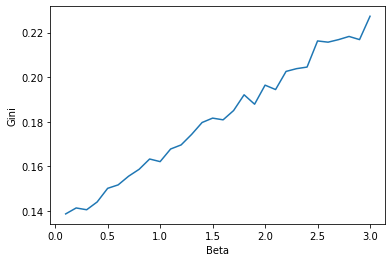

In [46]:
df = pickle.load( open( "results_test_1.pkl", "rb" ))
beta_list = list(df.columns)
gini_list = [calc_gini_col(df, beta) for beta in beta_list]
plt.plot(beta_list, gini_list)
plt.xlabel('Beta')
plt.ylabel('Gini')